##**PRESENTACIÓN DEL PROYECTO**

**Abstracto con Motivación y Audiencia**

En la actualidad, los casos de ataques al corazón o enfermedades cardiovasculares han disminuido desde los años 60. Pero desde la aparición del COVID-19, estos han vuelto a ser un tema de interés entre los médicos y profesionistas de la salud.

El proyecto busca analizar qué variables aumentan la probabilidad de contraer una condición cardiovascular. Esto ayudará a tener en cuenta que aspectos de la salud como de estilo de vida tener en cuenta y/o mejorar para la mejora de la salud de la población.


**Contexto Comercial y Analítico**

Los problemas de salud cardiovascular han sido tema de estudio desde hace decadas, pero con la llegada de enfermedades nuevas y acciones para la prevención de la salud, se han presentado con mayor frecuencia sin la necesidad de que la persona cuente con síntomas directamente con el corazón.

- **Contexto comercial**: Los centros de salud y hospitales han presentado un mayor número de pacientes con ataques del corazón. Este análisis busca ser de apoyo para identificar otros aspectos de la vida del paciente y la correlación entre las variables que puedan ser relevantes para la identificación de enfermedades del corazón o que afecten a este.

- **Contexto analítico**: El dataset contiene registros de ubicación de la población, historial clínico y estado de salud actual (nivel de actividad física, adicciones [alcohol, cigarro], medicación crónica, etc.).
Se usarán librerías de visualización (matplotlib, seaborn, numpy, pandas), y análisis de correlación para este estudio.


**Preguntas/Hipótesis a resolver mediante el Análisis de Datos**

**Hipótesis**

Hoy en día, la sociedad se ha dividido en 2 ambientes: rural y urbano.
Esta división ha marcado una diferencia en el estilo de vida y estatus de salud de las personas.

De manera simplificada, podemos observar que la gente dentro de una sociedad urbana, está más acostumbrada a tener una preferencia por el uso de medicamentos sintéticos (no necesarimante preescritos por un médico), y un nivel de estrés alto y constante.

Esta situación no confirma que un estilo social está más saludable que otro, pero si que existe una delimitación que es relevante para este estudio: el estilo de vida.

- ¿El estilo de vida es relevante para la aparición de ataques cardiacos?
- ¿Qué varibales son los que aportan a la presencia de este tipo de ataques a la salud de las personas?


**Objetivo**

Desarrollar un estudio donde los profesionales de la salud puedan apoyarse para la consideración de otras variables que puedan significar un mejor diagnóstico o prevención de ataques cardiacos.  


##**LECTURA DE DATOS**

###**Librerías necesarias para el análisis de datos**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

###**Configuración del entorno de Python en Google Colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Lectura del dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CoderHouse/Data_Science_2/Proyecto_DSII61680_LuisDavila/heart_attack_nigeria_youth_vs_adult.csv')

In [4]:
df.head(5)

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,41,Female,Rural,141.4,182.9,37.4,92,Moderate,False,...,Low,Low,Primary,Single,Urban,False,3,1.3,3,True
1,2,54,Male,Rural,130.4,252.4,17.9,81,Moderate,False,...,Low,Moderate,Higher,Divorced,Rural,False,1,0.9,8,False
2,3,24,Male,Urban,144.8,142.5,31.6,71,Low,True,...,High,Low,Primary,Married,Rural,True,3,2.2,5,False
3,4,59,Female,Suburban,163.1,312.4,11.4,67,Moderate,False,...,Low,Moderate,Secondary,Divorced,Rural,True,5,3.5,10,False
4,5,20,Male,Urban,120.7,298.4,29.3,90,High,True,...,Low,Low,Secondary,Married,Urban,True,4,2.3,6,True


###**Análisis inicial del dataset**

####**Información General**

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,1,2,3,4,5,6,7,8,9,10
Age,41,54,24,59,20,25,46,36,33,36
Gender,Female,Male,Male,Female,Male,Female,Male,Male,Female,Male
Region,Rural,Rural,Urban,Suburban,Urban,Rural,Urban,Urban,Rural,Rural
Blood_Pressure,141.4,130.4,144.8,163.1,120.7,141.7,97.2,124.1,131.4,124.8
Cholesterol,182.9,252.4,142.5,312.4,298.4,136.2,256.5,237.6,188.8,151.3
BMI,37.4,17.9,31.6,11.4,29.3,25.1,27.5,24.0,20.7,26.5
Heart_Rate,92,81,71,67,90,95,96,102,81,68
Exercise_Level,Moderate,Moderate,Low,Moderate,High,Low,Moderate,Moderate,Moderate,Low
Smoking,False,False,True,False,True,False,False,False,True,False


In [6]:
df.shape

(50000, 30)

**Descripción de variables**
- ID: Número identificador
- AGE: Edad (Intervalo)
- GENDER: Género (male, female, other) (Nominal)
- REGION: Región donde vive (urban, rural, suburban) (Nominal)
- BLOOD_PRESSURE: Fuerza que ejerce la sangre contra las paredes de los vasos sanguíneos (###.##)  (Intervalo)
- CHOLESTEROL: Nivel de colesterol en sangre (mg; bajo: < 40; normal: 41 - 200; alto: 201 - 239; elevado: > 240) (Intervalo)
- BMI: Índice de masa muscular (bajo: < 18.5; normal: 18.5 - 24.9; sobrepeso: 25.0 - 29.9; obesidad: > 30.0)  (Intervalo)
- HEART_RATE: Número de veces que late el corazón en un minuto  (Intervalo)
- EXERCISE_LEVEL: Nivél de actividad física (high, moderate, low) (Ordinal)
- SMOKING: Fumador (true, false) (Nominal)
- ALCOHOL_CONSUMPTION: Nível de consúmo de alcóhol (heavy, moderate, none) (Ordinal)
- DIABETES: Diabétes (true, false) (Nominal)
- FAMILY_HISTORY: Historial familiar (true, false) (Nominal)
- STRESS_LEVEL: Nivél de estrés (1 - 10) (Intervalo)
- HEART_ATTACK (**variable objetivo**): Ataques cardiácos (true, false) (Nominal)
- ANGINA: Dolor o molestia en el pecho que se produce cuando el corazón no recibe suficiente sangre (true, false) (Nominal)
- HEART_DISEASE_HISTORY: Historial de enfermedades cardiácas (true, false) (Nominal)
- DIET: Dieta (healthy, unhealthy, mixed) (Ordinal)
- SLEEP_HOURS: Horas de sueño (4 - 9) (Intervalo)
- OCCUPATION: Ocupación (employed, unemployed, student, retired) (Nominal)
- INCOME_LEVEL: Nivél de ingresos (high, middle, low) (Ordinal)
- PHYSICAL_ACTIVITY: Actividad física (high, moderate, low) (Ordinal)
- EDUCATION_LEVEL: Nivél de educación (primary, secondary, higher) (Nominal)
- MARITAL_STATUS: Estátus marital (single, married, divorced, widowed) (Nominal)
- URBAN_RURAL: Vivencia urbana o rural (urban, rural) (Nominal)
- MEDICATION: Medicaciones (true, false) (Nominal)
- HEALTH_AWARENESS: Conciencia de salud (1 - 5) (Intervalo)
- DAILY_WATER_INTAKE: Ingesta de agua diaria (0.5 - 4) (Intervalo)
- MENTAL_HEALTH: Salúd mental (1 - 10) (Intervalo)
- OBESITY: Obesidad (true, false) (Nominal)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    14930 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [8]:
df.describe()

,ID,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Stress_Level,Sleep_Hours,Health_Awareness,Daily_Water_Intake,Mental_Health
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,36.020400,124.730312,209.601122,26.976694,84.504340,5.516740,6.493916,2.998820,2.251884,5.477500
std,14433.901067,14.191716,17.987423,60.128478,6.001402,11.513936,2.873097,1.440283,1.414121,1.013574,2.864685
min,1.000000,12.000000,51.500000,-26.800000,0.500000,65.000000,1.000000,4.000000,1.000000,0.500000,1.000000
25%,12500.750000,24.000000,112.700000,168.900000,23.000000,75.000000,3.000000,5.300000,2.000000,1.400000,3.000000
50%,25000.500000,36.000000,124.700000,209.600000,27.000000,85.000000,6.000000,6.500000,3.000000,2.300000,5.000000
75%,37500.250000,48.000000,136.900000,250.000000,31.000000,94.000000,8.000000,7.700000,4.000000,3.100000,8.000000
max,50000.000000,60.000000,202.400000,437.600000,53.200000,104.000000,10.000000,9.000000,5.000000,4.000000,10.000000


####**Valores duplicados, nulos y en cero**

In [9]:
#Valores duplicados
df.duplicated().sum()

np.int64(0)

In [10]:
#Valores nulos
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Region,0
Blood_Pressure,0
Cholesterol,0
BMI,0
Heart_Rate,0
Exercise_Level,0
Smoking,0


<Axes: >

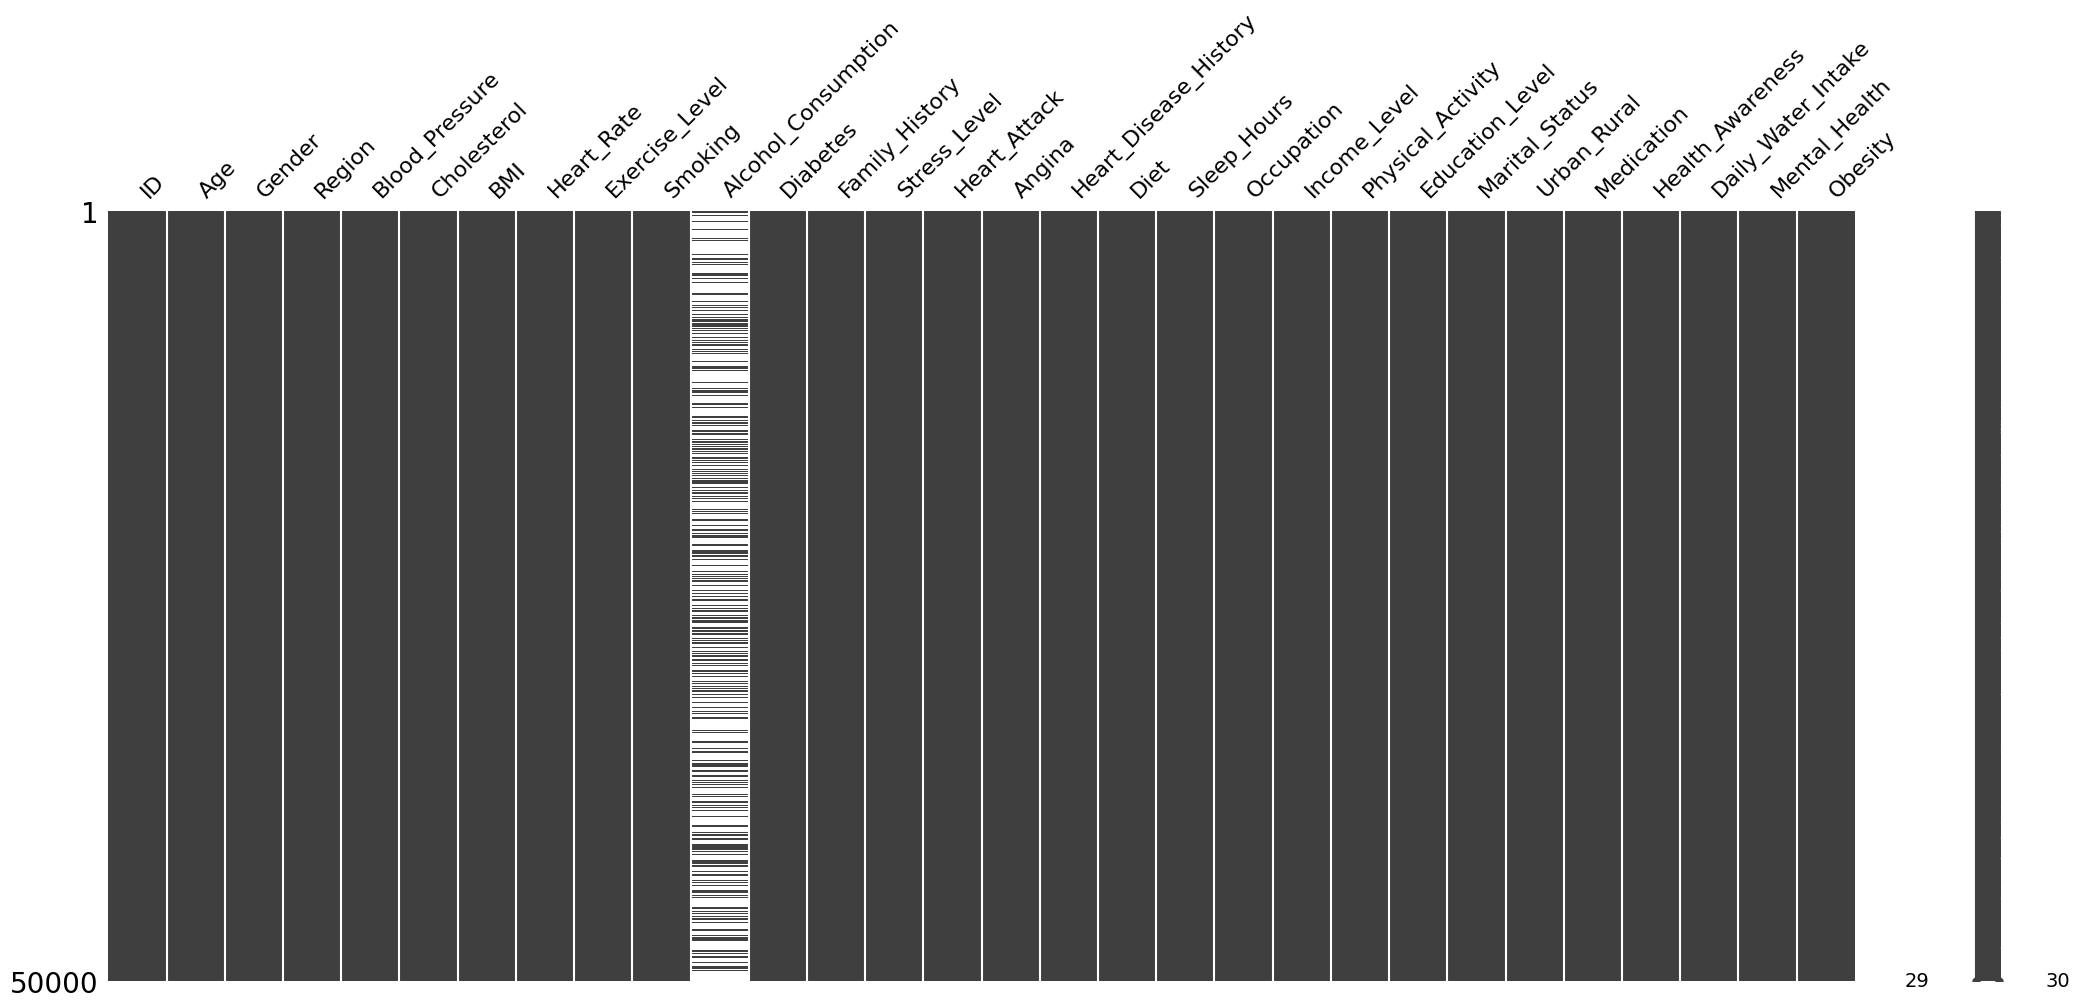

In [11]:
msno.matrix(df)

Se detectaron que los valores nulos solo se presentan en la variable 'Alcohol_Consumption'.
Este variable contempla 3 diferentes registros:
- Heavy
- Moderate
- None (NaN)

Este último se registró en el dataset como 'NaN' ya que la persona confirma que no consume alcohol.

In [12]:
#Valores cero
zero = df == 0
zero.sum()

,0
ID,0
Age,0
Gender,0
Region,0
Blood_Pressure,0
Cholesterol,1
BMI,0
Heart_Rate,0
Exercise_Level,0
Smoking,37606


In [13]:
columns_zero = (df[['Cholesterol', 'Smoking', 'Diabetes', 'Family_History', 'Heart_Attack', 'Angina', 'Heart_Disease_History', 'Medication', 'Obesity']] == 0).sum()
print(columns_zero)

Cholesterol                  1
Smoking                  37606
Diabetes                 41034
Family_History           24952
Heart_Attack             45014
Angina                   43962
Heart_Disease_History    40916
Medication               37345
Obesity                  37385
dtype: int64


Se observa que varias variables del dataset contienen datos con registro en '0'.
De las variables filtradas, solo 'Cholesterol' contiene un registro en '0'. Las personas no pueden tener un colesterol en 0 o negativo.

Si la persona tuviera un **colesterol debajo de 40**, aumenta su probabilidad de correr el riesgo de **sufrir enfermedades cardiovasculares**, hemorragia cerebral y enfermedades respiratorias.
Pero siempre existe un nivel mayor que '0'.

Las demás variables solo son confirmaciones sobre su estado fisico.
Por lo que una respuesta que niega la presencia de alguna de ellas, es comprensible.

##**DATA WRANGLING - LIMPIEZA Y TRANSFORMACIÓN DE DATOS**

**Valores duplicados**

No hay valores duplicados, por lo que no habrá alguna manipulación sobre este tipo de registros.

**Valores nulos**

Solo la variable 'Alcohol_Consumption' presenta valores nulos, donde cada valor 'NaN' se refiere a que la persona registra que no consume alcohol.

Estos valores serán cambiados por 'None'.

In [14]:
df2 = df.copy()
df2['Alcohol_Consumption'] = df2['Alcohol_Consumption'].fillna('None')

<Axes: >

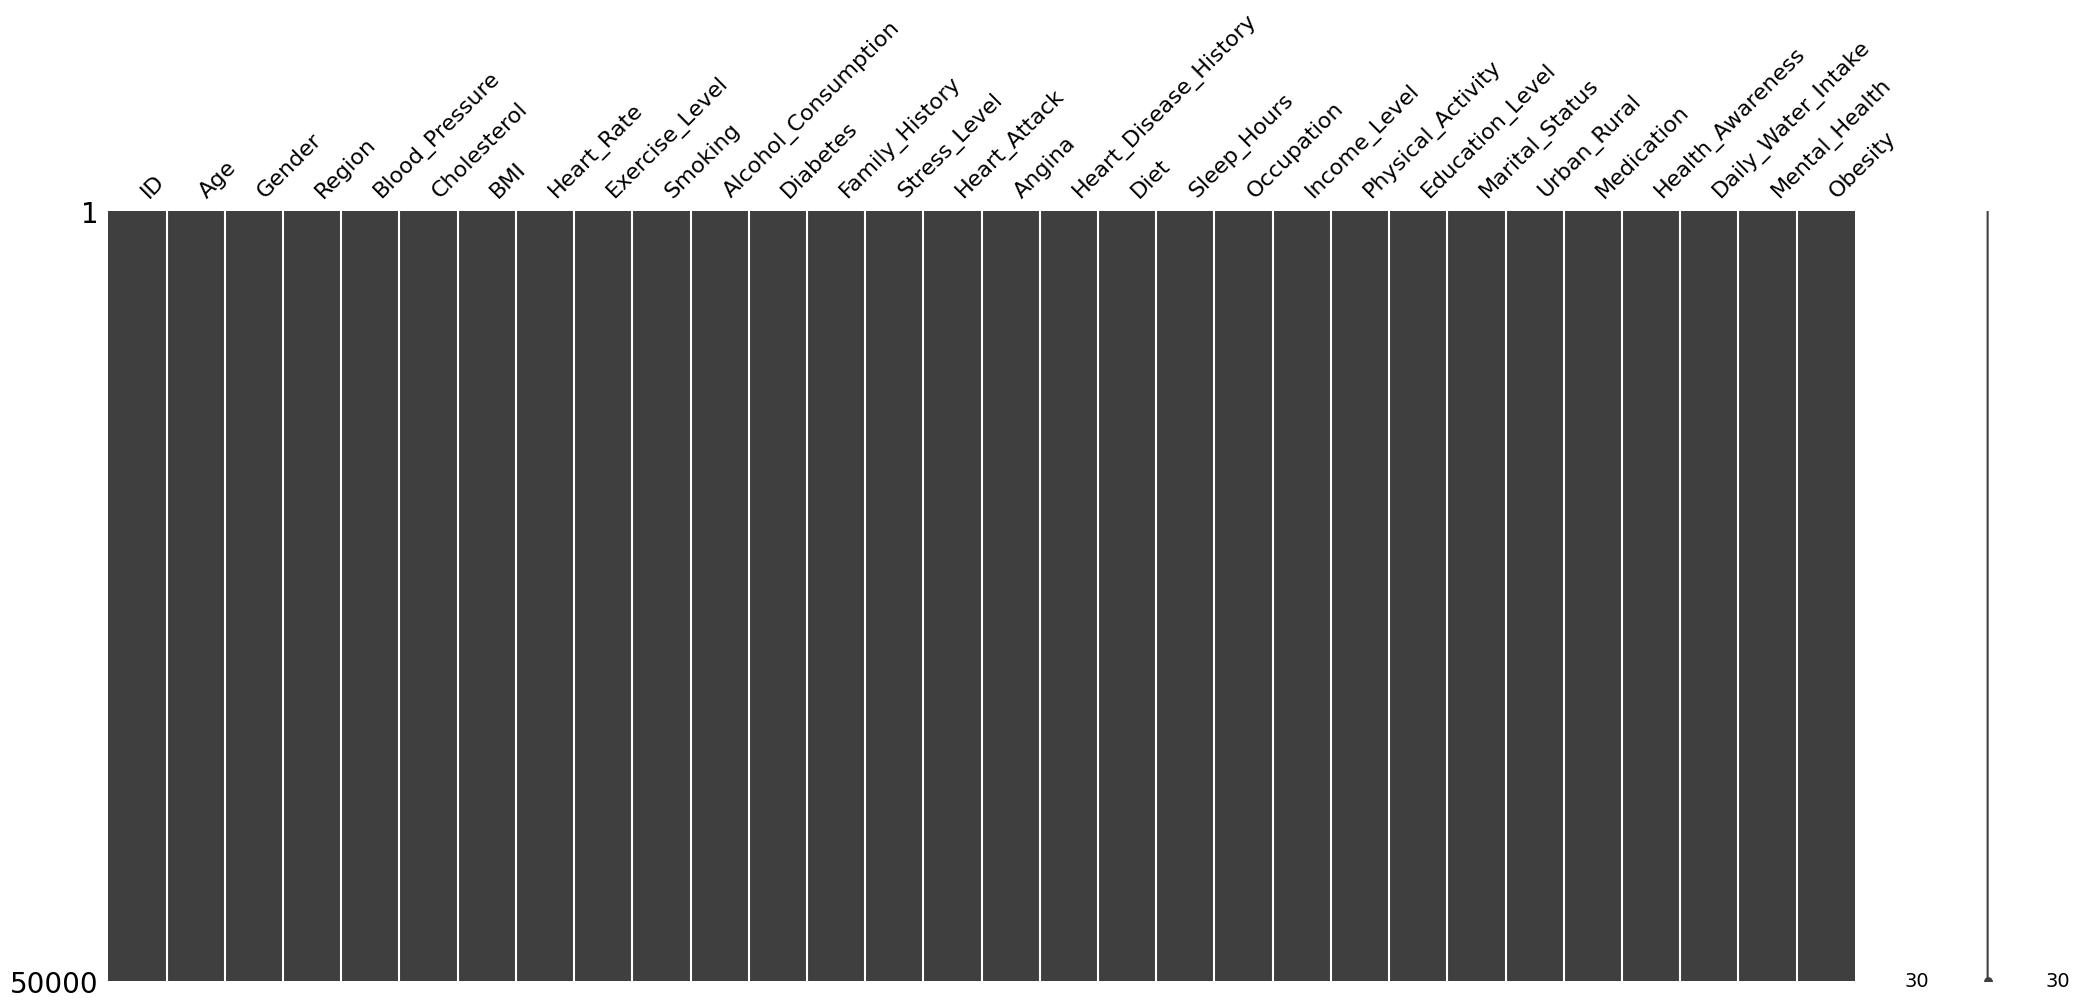

In [15]:
msno.matrix(df2)

**Tratamiento de valores outliers**

Con anterioridad observamos que la variable 'Cholesterol' presenta un registro en 0.
Este registro por si solo representa una anomalía en el dataset.

<Axes: ylabel='Cholesterol'>

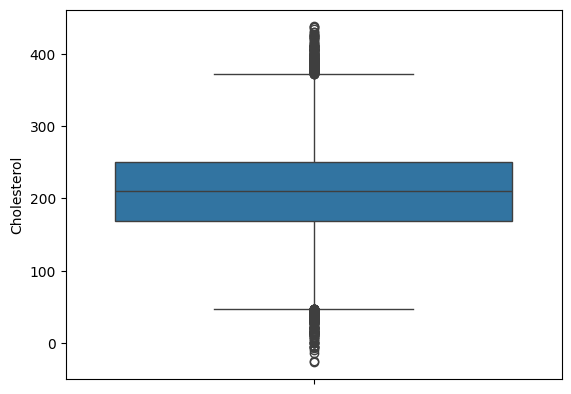

In [16]:
sns.boxplot(df2['Cholesterol'])

1. Además del registro en 0, se puede observar en el gráfico que presenta registros en negativo.
Esto no puede ser posible, pues el colesterol se encuentra en los alimentos, además de ser producido por el higado.

2. Los nivéles superiores a 200 se consideran altos. Por lo que nivéles que superen este límite pueden provocar una obstrucción aguda de la microcirculación de distintos órganos.
A diferencia de los datos por debajo de '0', los nivéles altos si son posibles, pero lo inusual es el brinco que da entre 260 y 380 (aproximadamente).

**Acción**:
Se eliminarán los registros que tengan nivéles en 0 y negativos. De esta manera la variable con contendrá registros erróneos y se mantendrán los outliers bajos y altos.

In [17]:
df3 = df2.copy()
df3 = df3.drop(df3[df3['Cholesterol'] <= 0].index)

<Axes: ylabel='Cholesterol'>

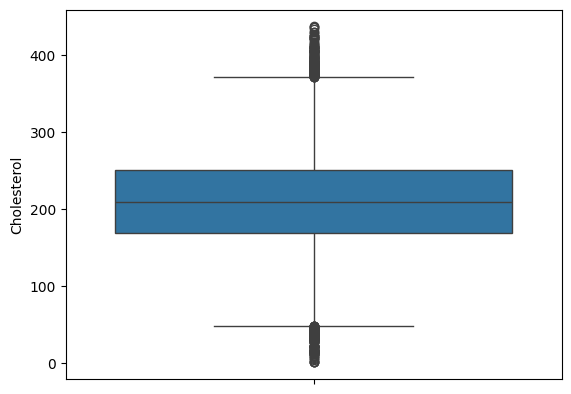

In [18]:
sns.boxplot(df3['Cholesterol'])

In [19]:
df3.shape

(49990, 30)

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49990 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49990 non-null  int64  
 1   Age                    49990 non-null  int64  
 2   Gender                 49990 non-null  object 
 3   Region                 49990 non-null  object 
 4   Blood_Pressure         49990 non-null  float64
 5   Cholesterol            49990 non-null  float64
 6   BMI                    49990 non-null  float64
 7   Heart_Rate             49990 non-null  int64  
 8   Exercise_Level         49990 non-null  object 
 9   Smoking                49990 non-null  bool   
 10  Alcohol_Consumption    49990 non-null  object 
 11  Diabetes               49990 non-null  bool   
 12  Family_History         49990 non-null  bool   
 13  Stress_Level           49990 non-null  int64  
 14  Heart_Attack           49990 non-null  bool   
 15  Angina 

**Otras transformaciones, normalización, fechas**

Se eliminará la variable 'Urban_Rural' del dataset.
Esta variable es muy similar a la variable 'Region' pero con un registro menos ('suburban').
Además de ser una variable repetitiva si al inicio ya se contaba con la variable 'Region', misma que registra la ubicación de la persona.

In [21]:
df4 = df3.copy()
df4 = df4.drop(columns='Urban_Rural', axis=1)

In [22]:
df4.shape

(49990, 29)

In [23]:
df4.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

##**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

Con el dataset estudiado y manipulado, se dará inicio con los análisis que responderán a las preguntas establecidas al inicio de este proyecto.

Las variables que se usarán en el análisis serán:
- Age (intervalo)
- Gender (nominal)
- Region (nominal)
- Excercise_Level (ordinal)
- Smoking (nominal)
- Alcohol_Consumption (ordinal)
- Stress_Level (intervalo)
- Heart_Attack (nominal) (**variable objetivo**)
- Diet (ordinal)
- Sleep_Hours (intervalo)
- Occupation (nominal)
- Education_Level (nominal)
- Marital_Status (nominal)
- Medication (nominal)
- Daily_Water_Intake (intervalo)

Se seleccionaron estas variables porque son las que más relazión tienen con un estilo de vida y no con el estado de salud de las personas.

**Análisis univariado**

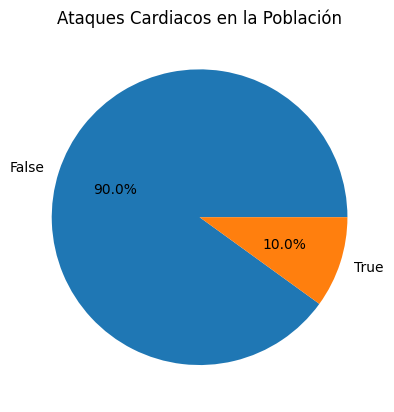

In [24]:
#ATAQUES CARDIACOS
h_attack = df4['Heart_Attack'].value_counts()

plt.pie(h_attack, labels=h_attack.index, autopct='%1.1f%%')
plt.title('Ataques Cardiacos en la Población')
plt.show()

Media: 0.09971994398879776
Mediana: 0.0
Moda: False


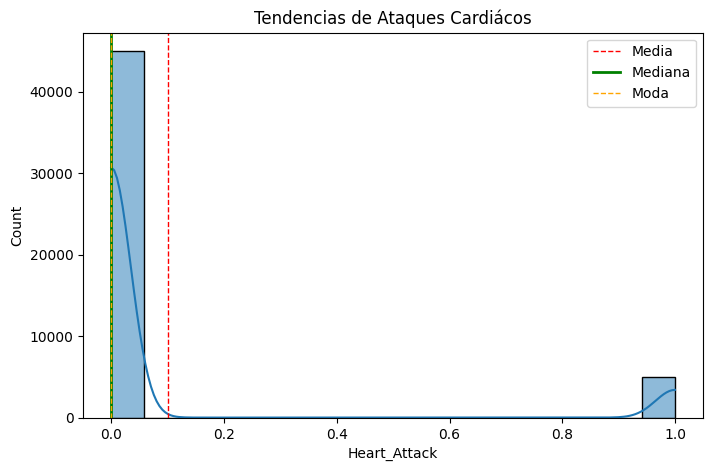

In [25]:
#ATAQUES CARDIÁCOS - MEDIA, MEDIANA Y MODA
media_hattack = df4['Heart_Attack'].mean()
mediana_hattack = df4['Heart_Attack'].median()
moda_hattack = df4['Heart_Attack'].mode()[0]

print('Media:', media_hattack)
print('Mediana:', mediana_hattack)
print('Moda:', moda_hattack)

#VISUALIZACIÓN
plt.figure(figsize=(8,5))
sns.histplot(df4['Heart_Attack'], kde=True)
plt.axvline(media_hattack, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(mediana_hattack, color='green', linestyle='-', linewidth=2, label='Mediana')
plt.axvline(moda_hattack, color='orange', linestyle='dashed', linewidth=1, label='Moda')
plt.title('Tendencias de Ataques Cardiácos')
plt.legend()
plt.show()

Como se menciona en el 'Abstract', este tipo de ataques siguen siendo relevantes para su estúdio médico.

Que un 10% de población haya presentado un ataque al corazón, es relevante que se analice el estilo de vida de las personas y así saber que acciones tomar o evitar para prevenir estos ataques.

En el segundo gráfico podemos observar que la moda y la mediana se mantienen a las tendencias de la población.
Respecto a la media, al tener registros que han presentado al menos un ataque cardiáco esta tendencia se ve afectada, ubicandose en una zona donde no hay valor.

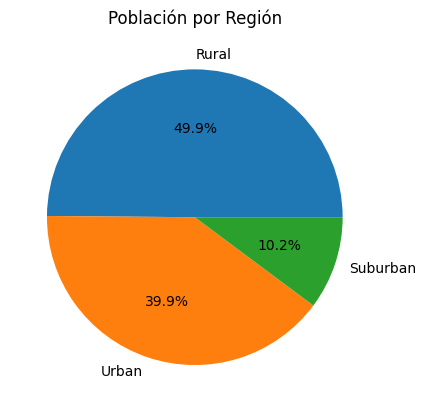

In [26]:
#POBLACIÓN POR REGION
region = df4['Region'].value_counts()

plt.pie(region, labels=region.index, autopct='%1.1f%%')
plt.title('Población por Región')
plt.show()

La gente tiene una preferencia por estar y/o mantenerse en zonas rurales que en urbanas o suburbanas.

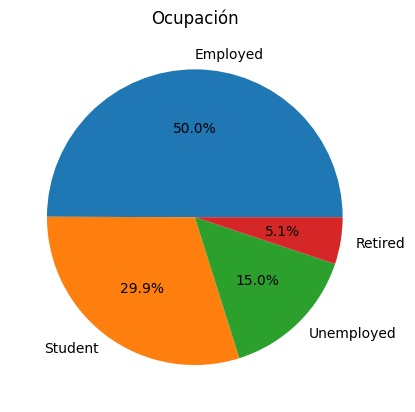

In [27]:
#OCUPACIONES
ocupaciones = df4['Occupation'].value_counts()

plt.pie(ocupaciones, labels=ocupaciones.index, autopct='%1.1f%%')
plt.title('Ocupación')

plt.show()

Existe un pequeño porcentaje de personas retiradas.
Esto nos comunica que hay un porcentaje de gente con o cercana a la edad de 60 años.

También tenemos una muestra del 65% que ya cuenta, contó o está en busca de un trabajo asalariado, no necesariamente que cuente con la edad legalmente permitida para realizar alguna actividad laboral (>= 18 años), pero si con la necesidad de tener un ingreso.

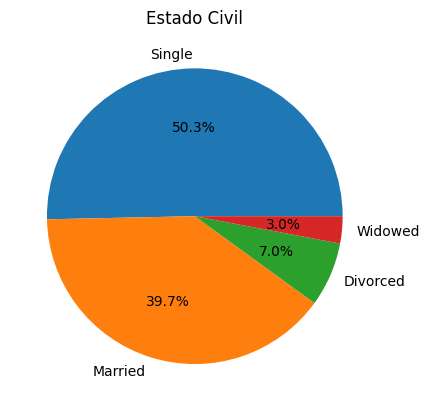

In [28]:
#MARITAL STATUS
estado_civil = df4['Marital_Status'].value_counts()

plt.pie(estado_civil, labels=estado_civil.index, autopct='%1.1f%%')
plt.title('Estado Civil')
plt.show()

Se muestra que en la población lidera la gente soltera.
Entre ellos se pueden 'esconder' gente divorciada o viuda que no quiere comunicar o etiquetarse bajo estos status.
 Por lo que se puede considerar que el segmento 'Single' lidera con un 60.3% de la población.
 Pues estas personas se encuentran disponibles (por alguna razón u otra) disponibles para establecer una (nueva) relación con otra persona.

 En relación con el gráfico 'Ocupaciones', el estatus nos permite suponer que la gente retirada tienen una probabilidad mayor a ser divorciada o viuda, y que los estudiantes sean solteros.

**Conclusión - Análisis Univariado**

Se observa que las 4 variables tienen procentajes similares.
Esto puede representar una tendencia cultural entre la gente que vive en zonas rurales y urbanas.

Si seguimos esta relación visual, la gente que vive en zonas suburbanas tienden a tener variaciones en el trabajo y/o en sus relaciones maritales.
Esto puede darse por la dificultad de transporte entre las zonas que tienden a frecuentar (casa, trabajo), que termina alterando el estatus de su relación marital (casado o no) o con su trabajo (desempleado o retirado).
O que este tipo de regiones establecen un cambio en la salud de las personas que tienden a generar un cambio relevante y que se mantiene constante en sus vidas.

En el caso de los ataques cardiacos, el 10% que ha presentado en algún momento este mal, se puede distribuir en las diferentes regiones.
Una suposición, al dividir en partes iguales este porcentaje (3.33%), la región suburbana presenta un mayor número de ataques al corazón en relación con el tamaño de la población.

Los análisis correlacionados serán realizados más adelante, por el momento se mantendra en suposición.

**Análisis bivariado**

In [29]:
#HEART ATTACK VS REGION
tabla_contingencia = pd.crosstab(df4['Heart_Attack'], df4['Region'])
tabla_contingencia.T

Heart_Attack,False,True
Region,,
Rural,22436,2494
Suburban,4571,523
Urban,17998,1968


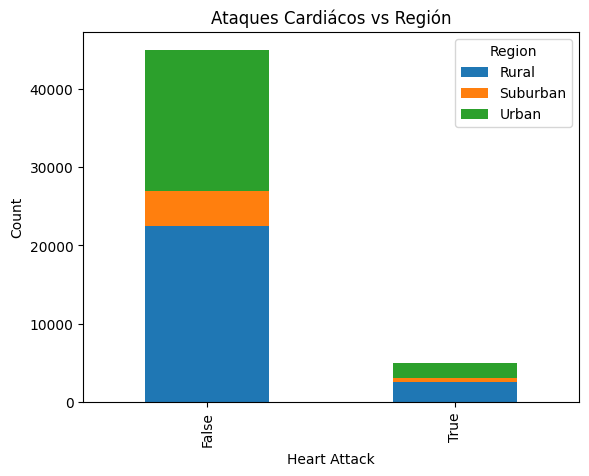

In [30]:
#TABLA DE CONTIGNENCIA - HEART ATTACK VS REGION
tabla_contingencia.plot(kind='bar', stacked=True)

plt.title('Ataques Cardiácos vs Región')
plt.xlabel('Heart Attack')
plt.ylabel('Count')
plt.show()

La cantidad de atáques cardiácos en la zona urbana, por la predisposición a enfermedades psicológicas y físicas, no es de esperarse que sea alto.
Pero es interesante que en la zona rural, a pesar de contar con una menor cantidad de población sin ataques, aún existe una cantidad relevante para la presencia de estos.
Esto nos muestra que una vida en el campo es igual de intensa que una vida en la ciudad.
Obviamente que tienen grandes diferencias entre si, pero siguen existiendo actividades en ambas regiones que alteran la salud de la población.

La presencia de ataques cardiácos se presentan de manera porcentual según la región, pero no es una variable que nos confirme que el habitar en alguna de estas regiones sea motivo de ataques cardiácos.

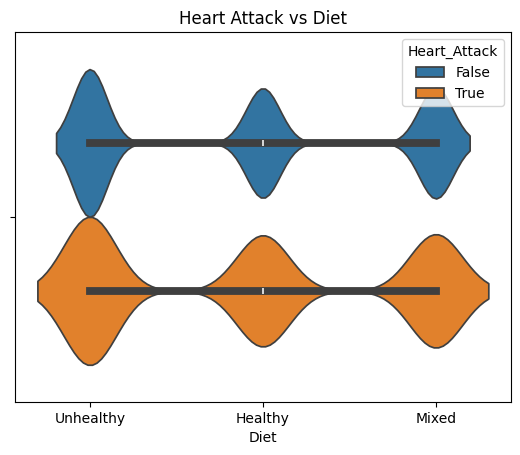

In [31]:
#HEART ATTACK VS DIET
sns.violinplot(x='Diet', hue='Heart_Attack', data=df4)
plt.title('Heart Attack vs Diet')
plt.show()

Los ataques cardiácos están presentes en personas que mantienen una dieta unhealthy (no saludable).
Pero es interesante observar que la que que lleva una dieta saludable y mixta, presentan un porcentaje similar de ataques presentados en sus vidas y aunque se mantienen conscientes de que su alimentación es importante para prevenir malestares y enfermedades, presentan un número considerable de casoso con ataques cardiácos.

Al observar el gráficos azúl, se puede notar con mayor claridad la diferencia entre las 3 categorías.
La dieta unhealthy sigue presentando un mayor porcentaje de la población, pero en este caso que **no** han sufrido un ataque cardiáco, seguido del mixto y luego del saludable.

Esto nos comunica que el mantener una alimentación saludable no nos libra de algún síntoma o ataque cardiáco, pero si que tengamos una menor probabilidad de que se presenten.  

**Análisis multivariado**

In [32]:
df5 = df4.copy()

In [33]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df5['Gender_cod'] = le.fit_transform(df5['Gender'])
df5['Region_cod'] = le.fit_transform(df5['Region'])
df5['Exercise_Level_cod'] = le.fit_transform(df5['Exercise_Level'])
df5['Smoking_cod'] = le.fit_transform(df5['Smoking'])
df5['Alcohol_Consumption_cod'] = le.fit_transform(df5['Alcohol_Consumption'])
df5['Diet_cod'] = le.fit_transform(df5['Diet'])
df5['Occupation_cod'] = le.fit_transform(df5['Occupation'])
df5['Education_Level_cod'] = le.fit_transform(df5['Education_Level'])
df5['Marital_Status_cod'] = le.fit_transform(df5['Marital_Status'])
df5['Medication_cod'] = le.fit_transform(df5['Medication'])
df5['Heart_Attack_cod'] = le.fit_transform(df5['Heart_Attack'])

In [34]:
df5.head(5)

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Region_cod,Exercise_Level_cod,Smoking_cod,Alcohol_Consumption_cod,Diet_cod,Occupation_cod,Education_Level_cod,Marital_Status_cod,Medication_cod,Heart_Attack_cod
0,1,41,Female,Rural,141.4,182.9,37.4,92,Moderate,False,...,0,2,0,2,2,2,1,2,0,0
1,2,54,Male,Rural,130.4,252.4,17.9,81,Moderate,False,...,0,2,0,1,0,3,0,0,0,1
2,3,24,Male,Urban,144.8,142.5,31.6,71,Low,True,...,2,1,1,2,0,0,1,1,1,0
3,4,59,Female,Suburban,163.1,312.4,11.4,67,Moderate,False,...,1,2,0,1,0,0,2,0,1,0
4,5,20,Male,Urban,120.7,298.4,29.3,90,High,True,...,2,0,1,0,0,2,2,1,1,0


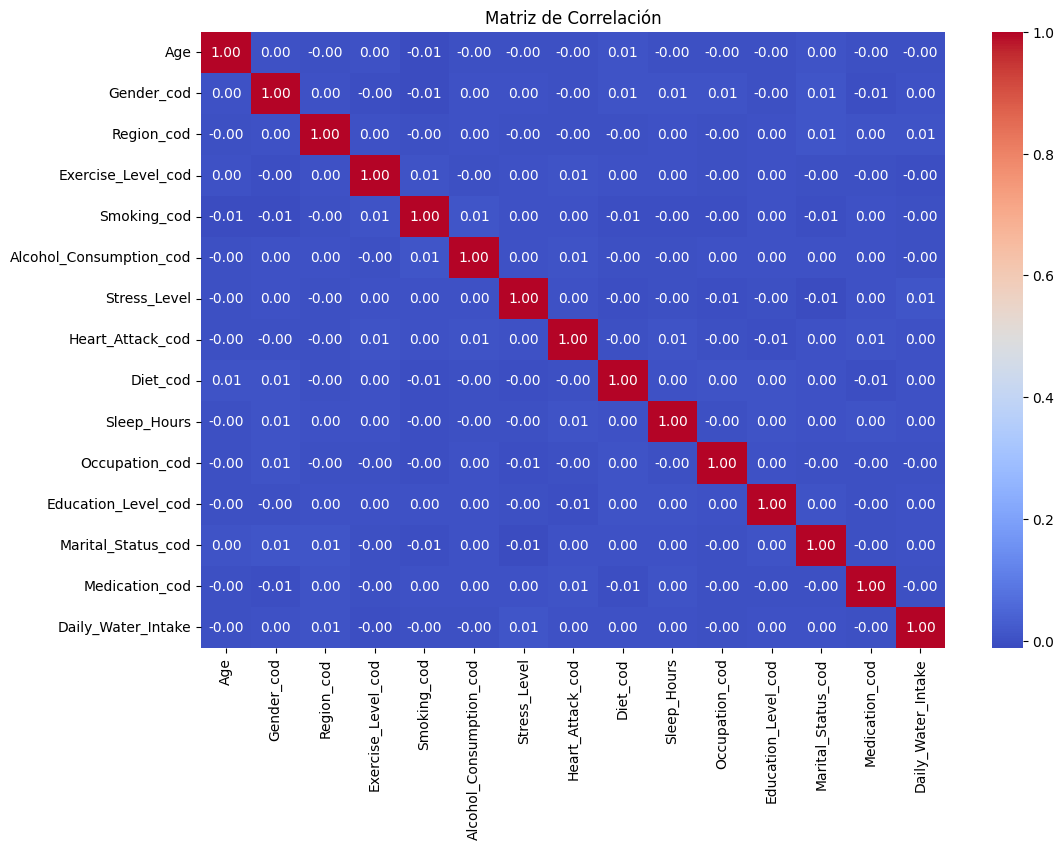

In [35]:
#MATRÍZ DE CORRELACIÓN
lifestyle = df5[['Age', 'Gender_cod', 'Region_cod', 'Exercise_Level_cod', 'Smoking_cod', 'Alcohol_Consumption_cod', 'Stress_Level', 'Heart_Attack_cod',
                 'Diet_cod', 'Sleep_Hours', 'Occupation_cod', 'Education_Level_cod', 'Marital_Status_cod', 'Medication_cod', 'Daily_Water_Intake']]

corr = lifestyle.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

La matríz de correlación muestra que las variables de estilo de vida seleccionadas, muestran una correlación nula para la presentación de ataques cardíacos.  

Es importante tener en cuenta que la matriz de correlación solo muestra relaciones lineales entre las variables.

A pesar de no haber encontrado correlaciones relevantes, nos permite descartar algunas variables y enfocarse en otras (o analizarlas desde otras perspectivas).

##**ALGORÍTMOS DE APRENDIZAJE**

####**Árbol de Decisión**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#SEPARAR CARACTERÍSTICAS 'X' Y CLASE OBJETIVO 'y'
X = df5[['Age', 'Gender_cod', 'Region_cod', 'Exercise_Level_cod', 'Smoking_cod', 'Alcohol_Consumption_cod', 'Stress_Level', 'Diet_cod', 'Sleep_Hours', 'Occupation_cod', 'Education_Level_cod', 'Marital_Status_cod', 'Medication_cod', 'Daily_Water_Intake']]
y = df5['Heart_Attack_cod']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#ENTRENAMIENTO DE MODELO (ÁRBOL DE DECISIÓN)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#PREDICCIONES
y_pred = clf.predict(X_test)

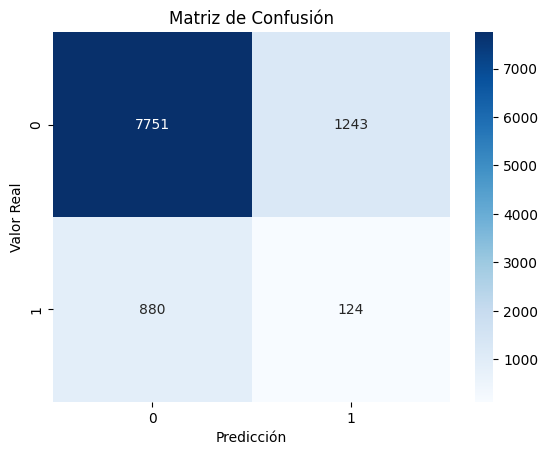

In [ ]:
#MATRIZ DE CONFUSIÓN
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#EVALUACIÓN
print('Reporte de Clasificación:\n', classification_report(y_test, y_pred))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      8994
           1       0.09      0.12      0.10      1004

    accuracy                           0.79      9998
   macro avg       0.49      0.49      0.49      9998
weighted avg       0.82      0.79      0.80      9998



El modelo de árbol de decisión mostró un rendimiento de predicción dispar para las dos clases del problema de predicción de ataques cardíacos.

A pesar de lograr una alta precisión en la identificación de personas sin ataques cardíacos (clase 0), con un valor de 0.88 para la métrica f1-score.
Su capacidad para predecir correctamente la clase positiva (personas con ataques cardíacos) fue significativamente menor, evidenciado por un f1-score de 0.10 para la clase 1.

Estos resultados suguieren un ajuste de hiperparámetros (criterion [gini, entropy], max_depth, min_samples_split, min_samples_leaf, max_features, splitter).

Los resultados pueden no dar lo esperado, pero si se acerca a una predicción más afinada.

####**K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df5[['Age', 'Gender_cod', 'Region_cod', 'Exercise_Level_cod', 'Smoking_cod', 'Alcohol_Consumption_cod', 'Stress_Level', 'Diet_cod', 'Sleep_Hours', 'Occupation_cod', 'Education_Level_cod', 'Marital_Status_cod', 'Medication_cod', 'Daily_Water_Intake']]
y = df5['Heart_Attack_cod']

In [ ]:
#ESCALADO DE CARACTERÍSTICAS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#ENTRENAMIENTO DE MODELO
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_knn_pred = knn.predict(X_test)

In [ ]:
#EVALUACIÓN DE MODELO
print('Exactitud del modelo:', accuracy_score(y_test, y_knn_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_knn_pred))

Exactitud del modelo: 0.8914782956591318

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      8994
           1       0.07      0.01      0.01      1004

    accuracy                           0.89      9998
   macro avg       0.49      0.50      0.48      9998
weighted avg       0.82      0.89      0.85      9998



In [ ]:
#VALIDACIÓN CRUZADA
cv_knn_range = range(1, 21)
cv_knn_scores = []

In [ ]:
for k in cv_knn_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
  cv_knn_scores.append(np.mean(scores))

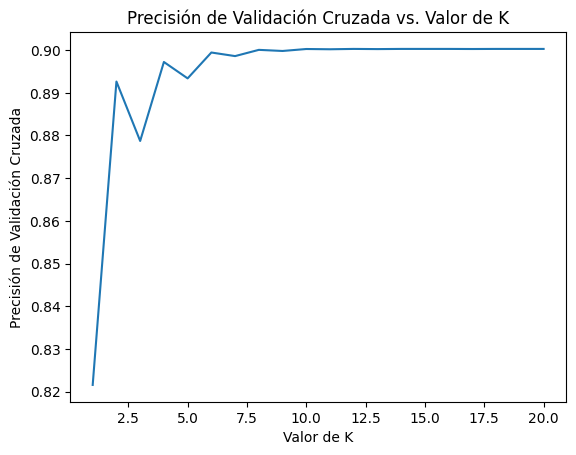

In [ ]:
#VISUALIZACIÓN CV
plt.plot(cv_knn_range, cv_knn_scores)
plt.xlabel('Valor de K')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Precisión de Validación Cruzada vs. Valor de K')
plt.show()

In [ ]:
print('Mejor precisión de validación cruzada:', max(cv_knn_scores))
print('Valor de K correspondiente:', cv_knn_scores.index(max(cv_knn_scores)) + 1)

Mejor precisión de validación cruzada: 0.9002800560112021
Valor de K correspondiente: 12


El modelo K-Nearest Neighbors (KNN), aplicado con 5 vecinos y tras un escalado de las características, logró una precisión general alta en la predicción de ataques cardíacos. Sin embargo, un análisis más profundo mediante el reporte de clasificación reveló un desbalance en su rendimiento.

Si bien el modelo demostró una alta capacidad para predecir correctamente los casos de personas que no han sufrido un ataque cardíaco (clase 0), su precisión para identificar a aquellos que sí los han experimentado (clase 1) fue considerablemente menor. Este comportamiento sugiere un posible sesgo del modelo hacia la clase mayoritaria, lo que podría llevar a una subestimación del riesgo en individuos propensos a sufrir ataques cardíacos.

Los resultados de la validación cruzada muestran que el modelo de K-Nearest Neighbors (KNN) es un buen modelo para predecir ataques cardiácos, pero en el gráfico se observa que el modelo desarrolla un sobreaprendizaje.

A pesar de estos resultados, es necesario utilizar ajustes de hiperparámetros (distancias, número de vecinos), priorizando la correcta identificación de los casos positivos.
Asegurando una herramienta más confiable para la toma de decisiones en el ámbito de la salud.

####**Support Vector Machine (SVM)**

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
#SEPARAR CARACTERÍSTICAS 'X' Y CLASE OBJETIVO 'y'
X = df5[['Age', 'Gender_cod', 'Region_cod', 'Exercise_Level_cod', 'Smoking_cod', 'Alcohol_Consumption_cod', 'Stress_Level', 'Diet_cod', 'Sleep_Hours', 'Occupation_cod', 'Education_Level_cod', 'Marital_Status_cod', 'Medication_cod', 'Daily_Water_Intake']]
y = df5['Heart_Attack_cod']

In [112]:
#ESCALAR CARATERÍSTICAS
#ESCALADO DE CARACTERÍSTICAS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [117]:
#SVM - Kernel Lineal
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [118]:
#FRONTERA DE DECISIÓN
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100),
                     np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100))

In [119]:
#PREDICCIÓN DE CLASE
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-120-a3a63172dd80>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:500, 0], X_test[:500, 1], c=y_test[:500], cmap='coolwarm', edgecolors='k', marker='x', s=10)
<ipython-input-120-a3a63172dd80>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


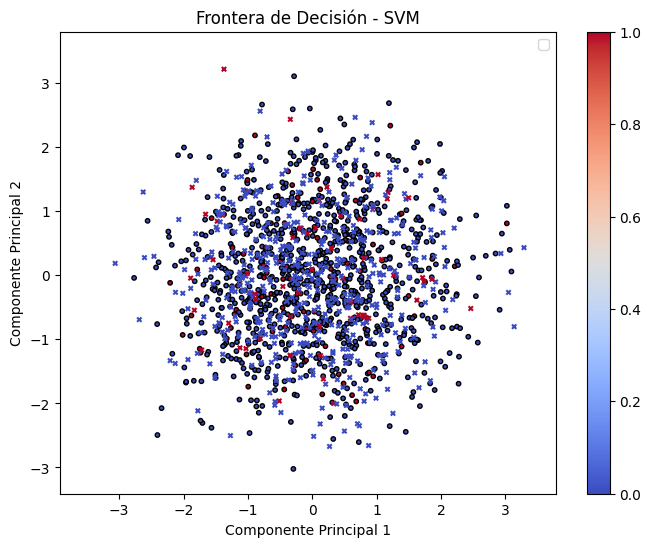

In [120]:
#VISUALIZACIÓN
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')

plt.scatter(X_train[:1000, 0], X_train[:1000, 1], c=y_train[:1000], cmap='coolwarm', edgecolors='k', marker='o', s=10)
plt.scatter(X_test[:500, 0], X_test[:500, 1], c=y_test[:500], cmap='coolwarm', edgecolors='k', marker='x', s=10)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión - SVM')
plt.legend()
plt.colorbar()
plt.show()

El modelo Support Vector Machine (SVM), aplicando una reducción de dimensionalidad simple con PCA y la disminución de puntos a mostrar, no logra una clasificación clara de las predicciones de ataques cardiácos en la población.

En el gráfico podemos observar que el modelo superpone las predicciones, indicando que no úede discriminar de manera confiable quien presenta y quien no presenta riesgo de ataque cardiáco según las variables utlizadas.

Esto nos permite saber que las variables utilizadas no proporcionan la información necesaria para que el modelo pueda aprender o identificar un patrón en los estilos de vida con posibilidad de presencia de estos ataques.   

Es necesario un ajuste para mejorar el aprendizaje del modelo, esto puede ser una aplicación de kernels no lineales o ajuste en la reducción con PCA.

##**AJUSTE DE HIPERPARÁMETROS**

####**SMOTE**

Con los análisis que se han mostrado con anterioridad, la base de datos presenta un desbalance relevante entre las clases a predecir.
La clase minoritaria (ataques cardiácos) representa solo el 10% de los datos, mientras que la clase mayoritaria (sin ataques cardiácos) constituye el 90% restante.
Esto obstaculiza el correcto aprendizaje de los modelos probados, ya que tienden a sesgarse hacia la clase mayoritaria.

Para tener una mejor aproximación a resultados óptimos, se utilizará el componente SMOTE (Synthetic Minority Oversampling Technique), apoyando a la categoría con menor frecuencia.
SMOTE genera muestras sintéticas de la clase minoritaria, balanceando el dataset y permitiendo al modelo aprender mehor las características de esta clase, mejorando su capacidad de predicción.


In [38]:
#INSTALACIÓN DE LIBRERÍAS
!pip install imbalanced-learn

In [39]:
#IMPORTACIÓN
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE(random_state=42)

In [41]:
X_smote, y_smote = smote.fit_resample(X, y)

####**Árbol de Decisión - Ajuste de Hiperparámetros**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
#AJUSTE DE HIPERPARÁMETROS
clf_adjusted = DecisionTreeClassifier(criterion='entropy', min_samples_split=3, random_state=42)
clf_adjusted.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=3,
                       random_state=42)

In [ ]:
y_pred_adjusted = clf_adjusted.predict(X_test)

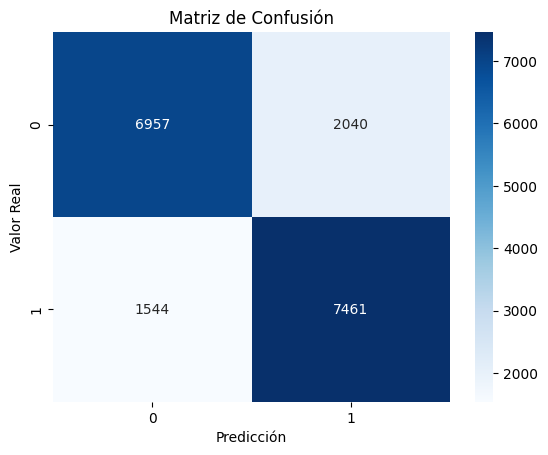

In [ ]:
#MATRIZ DE CONFUSIÓN
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#REPORTE DE CLASIFICACIÓN
print('Reporte de Clasificación:\n', classification_report(y_test, y_pred_adjusted))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      8997
           1       0.79      0.83      0.81      9005

    accuracy                           0.80     18002
   macro avg       0.80      0.80      0.80     18002
weighted avg       0.80      0.80      0.80     18002



La aplicación de SMOTE resultó en una mejora significativa en el rendimiento del modelo de árbol de decisión, especialmente en la predicción de la clase minoritaria (ataques cardiácos).

En la matríz de confusión, si bien la cantidad de 'VP' disminuyó ligeramte, el aumento en los 'VN' indica un mejor rendiimiento del modelo para identificar correctamente a las personas sin riesgo de ataque cardiáco. El incremento de las falsas predicciones (FP y FN), es un efecto esperado de SMOTE al balancear el dataset, y debe ser evaluado en conjunto con la mejora genreal del modelo.

El reporte de clasificación confirma la mejora del modelo, la precisión, recall y f1-score para la clase de ataques cardiácos (1) aumentaron drásticamente.
Este aumento demuestra que SMOTE permitió al modelo aprender de forma efectiva las características de la clase minoritaria, mejorando su capacidad de predicción.


####**K-Nearest Neighbors (KNN) - Ajuste de Hiperparámetros**

In [ ]:
#ESCALADO DE CARACTERÍSTICAS
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.2, random_state=42)

In [ ]:
#ENTRENAMIENTO DE MODELO
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_knn_pred = knn.predict(X_test)

In [ ]:
#EVALUACIÓN DE MODELO
print('Exactitud del modelo:', accuracy_score(y_test, y_knn_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_knn_pred))

Exactitud del modelo: 0.7635262748583491

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.64      0.73      8997
           1       0.71      0.88      0.79      9005

    accuracy                           0.76     18002
   macro avg       0.78      0.76      0.76     18002
weighted avg       0.78      0.76      0.76     18002



In [ ]:
#VALIDACIÓN CRUZADA
cv_knn_range = range(1, 21)
cv_knn_scores = []

In [ ]:
for k in cv_knn_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_smote_scaled, y_smote, cv=5, scoring='accuracy')
  cv_knn_scores.append(np.mean(scores))

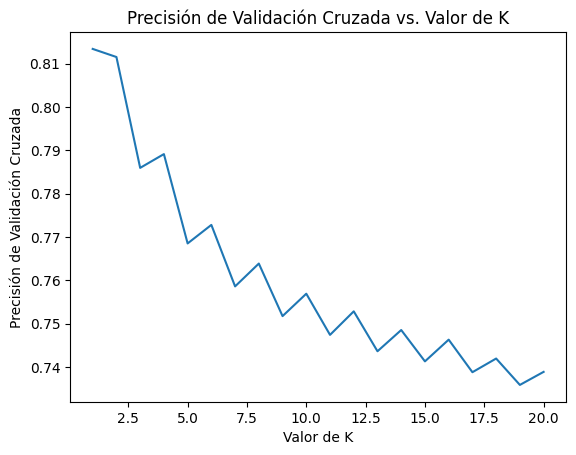

In [ ]:
#VISUALIZACIÓN CV
plt.plot(cv_knn_range, cv_knn_scores)
plt.xlabel('Valor de K')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Precisión de Validación Cruzada vs. Valor de K')
plt.show()

In [ ]:
print('Mejor precisión de validación cruzada:', max(cv_knn_scores))
print('Valor de K correspondiente:', cv_knn_scores.index(max(cv_knn_scores)) + 1)

Mejor precisión de validación cruzada: 0.8133985112765248
Valor de K correspondiente: 1


#####**Menor número de vecinos**

In [ ]:
#ENTRENAMIENTO DE MODELO
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_knn_pred = knn.predict(X_test)

In [ ]:
#EVALUACIÓN DE MODELO
print('Exactitud del modelo:', accuracy_score(y_test, y_knn_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_knn_pred))

Exactitud del modelo: 0.7815242750805466

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.87      0.67      0.75      8997
           1       0.73      0.90      0.80      9005

    accuracy                           0.78     18002
   macro avg       0.80      0.78      0.78     18002
weighted avg       0.80      0.78      0.78     18002



In [ ]:
#VALIDACIÓN CRUZADA
cv_knn_range = range(1, 21)
cv_knn_scores = []

In [ ]:
for k in cv_knn_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_smote_scaled, y_smote, cv=5, scoring='accuracy')
  cv_knn_scores.append(np.mean(scores))

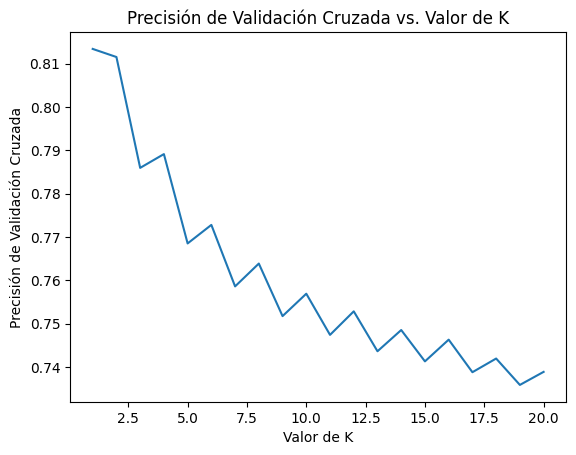

In [ ]:
#VISUALIZACIÓN CV
plt.plot(cv_knn_range, cv_knn_scores)
plt.xlabel('Valor de K')
plt.ylabel('Precisión de Validación Cruzada')
plt.title('Precisión de Validación Cruzada vs. Valor de K')
plt.show()

In [ ]:
print('Mejor precisión de validación cruzada:', max(cv_knn_scores))
print('Valor de K correspondiente:', cv_knn_scores.index(max(cv_knn_scores)) + 1)

Mejor precisión de validación cruzada: 0.8133985112765248
Valor de K correspondiente: 1


El modelo KNN, tras la aplicación del SMOTE y el ajuste de hiperparámetros, mostró una mejora significativa en su capacidad de predecir ataques cardiácos.

Aunque inicialmente el modelo presentaba un desbalance, inclinado hacia la clase 'sin ataques cardiácos', SMOTE logró balancear el conjunto de datos, permitiendo al modelo aprender de manera efectiva las características de ambas clases.

Sin embargo, pese a la mejora para la clase 1 (ataques cardiácos), la validación cruzada reveló un posible sobreajuste con valores bajos de 'K'.
Esto sugiere que el modelo podría estar memorizando los datos de entrenamiento.

Por lo tanto, si bien el modelo KNN ajustado con SMOTE representa una herramienta con mayor potencial, es crucial considerar el riesgo del sobreajuste y su posible impacto en la toma de decisiones en casos reales.

####**Support Vector Machine (SVM) - Ajuste de Hiperparámetros**

In [42]:
#ESCALAR CARATERÍSTICAS
#ESCALADO DE CARACTERÍSTICAS
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

In [43]:
#PCA
pca = PCA(n_components=2)
X_smote_pca = pca.fit_transform(X_smote_scaled)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_pca, y_smote, test_size=0.2, random_state=42)

#####**Kernel Lineal - Ajuste de 'c'**

In [45]:
#SVM - Kernel Polinómico
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
#FRONTERA DE DECISIÓN
xx, yy = np.meshgrid(np.linspace(X_smote_pca[:, 0].min(), X_smote_pca[:, 0].max(), 100),
                     np.linspace(X_smote_pca[:, 1].min(), X_smote_pca[:, 1].max(), 100))

In [47]:
#PREDICCIÓN DE CLASE
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-52-3e4ea3dc617d>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:250, 0], X_test[:250, 1], c=y_test[:250], cmap='coolwarm', edgecolors='k', marker='x', s=10)
<ipython-input-52-3e4ea3dc617d>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


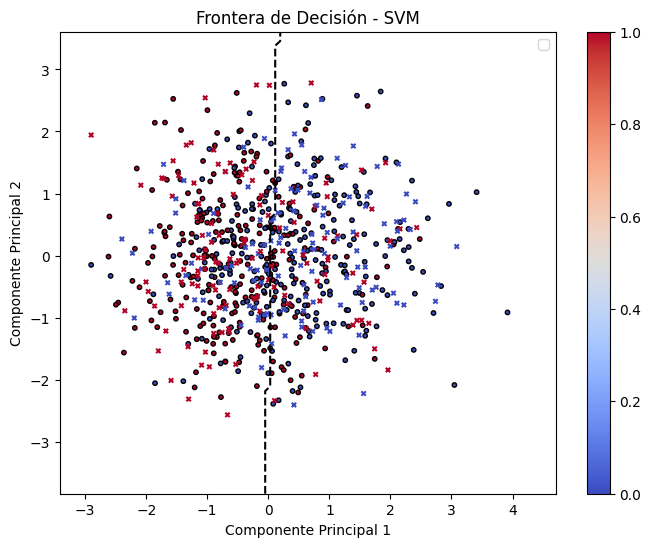

In [52]:
#VISUALIZACIÓN
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')

plt.scatter(X_train[:500, 0], X_train[:500, 1], c=y_train[:500], cmap='coolwarm', edgecolors='k', marker='o', s=10)
plt.scatter(X_test[:250, 0], X_test[:250, 1], c=y_test[:250], cmap='coolwarm', edgecolors='k', marker='x', s=10)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión - SVM')
plt.legend()
plt.colorbar()
plt.show()

#####**Kernel Polinómico**

In [132]:
#SVM - Kernel Polinómico
svm = SVC(kernel='poly', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [138]:
#FRONTERA DE DECISIÓN
xx, yy = np.meshgrid(np.linspace(X_smote_pca[:, 0].min(), X_smote_pca[:, 0].max(), 100),
                     np.linspace(X_smote_pca[:, 1].min(), X_smote_pca[:, 1].max(), 100))

In [139]:
#PREDICCIÓN DE CLASE
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-140-a3a63172dd80>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:500, 0], X_test[:500, 1], c=y_test[:500], cmap='coolwarm', edgecolors='k', marker='x', s=10)
<ipython-input-140-a3a63172dd80>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


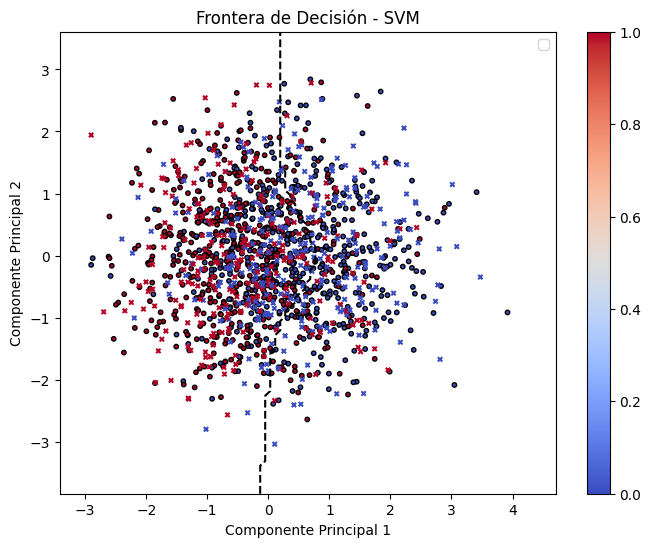

In [140]:
#VISUALIZACIÓN
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')

plt.scatter(X_train[:1000, 0], X_train[:1000, 1], c=y_train[:1000], cmap='coolwarm', edgecolors='k', marker='o', s=10)
plt.scatter(X_test[:500, 0], X_test[:500, 1], c=y_test[:500], cmap='coolwarm', edgecolors='k', marker='x', s=10)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión - SVM')
plt.legend()
plt.colorbar()
plt.show()

#####**Kernel RBF**

In [141]:
#SVM - Kernel RBF
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [142]:
#FRONTERA DE DECISIÓN
xx, yy = np.meshgrid(np.linspace(X_smote_pca[:, 0].min(), X_smote_pca[:, 0].max(), 100),
                     np.linspace(X_smote_pca[:, 1].min(), X_smote_pca[:, 1].max(), 100))

In [143]:
#PREDICCIÓN DE CLASE
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-144-a3a63172dd80>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:500, 0], X_test[:500, 1], c=y_test[:500], cmap='coolwarm', edgecolors='k', marker='x', s=10)
<ipython-input-144-a3a63172dd80>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


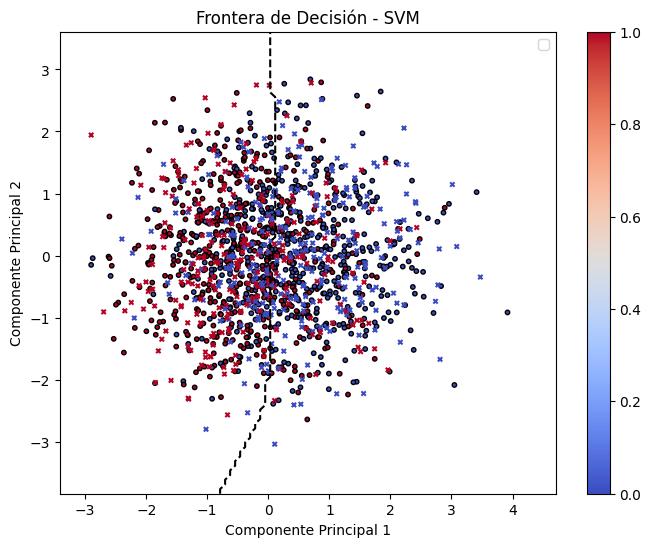

In [144]:
#VISUALIZACIÓN
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')

plt.scatter(X_train[:1000, 0], X_train[:1000, 1], c=y_train[:1000], cmap='coolwarm', edgecolors='k', marker='o', s=10)
plt.scatter(X_test[:500, 0], X_test[:500, 1], c=y_test[:500], cmap='coolwarm', edgecolors='k', marker='x', s=10)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Frontera de Decisión - SVM')
plt.legend()
plt.colorbar()
plt.show()

El modelo SVM, incluso después de la aplicación de SMOTE y el ajuste de hiperparámetros (cambio de kernel y ajuste de 'c'), no muestra un rendimiento satisfactorio en la predicción de ataques cardiácos.

Los resultados indican que el modelo no pudo establecer una forntera de decisión clara que diferencie eficazmente entre las clases, como se muestra en la superposición de las predicciones en las visualizaciones, a pesar de utilizar diferentes kernels y ajustes en 'c', por el momento no parece ser buena opción para este proyecto.

##**CONCLUSIÓN**

Los modelos utilizados muestran diferentes resultados que pueden ser útiles para la clasificación y toma de decisiones a la hora de estar con un paciente que, por su historial clínico y estilo de vida, pueda mostrar indicios de riesgo de padecer ataques cardiácos.

Los modelos que muestran óptimos resultados para la correcta clasificación son el 'árbol de decisión' y 'k-nearest neighbors'(KNN).

- **Árbol de decisión**: Este modelo muestra una correcta clasificación en sus predicciones posterior al uso del componente SMOTE. Esto indica que la base de datos utilizada requiere que esté en constante alimentación para evitar el debalance en la clase objetivo (Heart_Attack).

- **K-Nearest Neighbors**: El uso de clasificación por cercanía resultó un modelo con resultados satisfactorios, pero al igual que el árbol de decisión, el modelo muestra una mejoría posterior al uso del componente SMOTE.

- Ambos modelos muestran una precisión alrededor del 80%. Esto con la ayuda de SMOTE y la reducción del desbalance entre clases en el conjunto de datos que aplica con el aumento de datos en la clase minorista.

Estos resultados nos indican que el uso de datos actualizados permitirá que las predicciones sean precisas y clasificadas correctamente.
Disminuyendo el error de clasficación a la hora de tener un paciente nuevo.

En el caso del modelo **SVM**, no es la herramienta más adecuada para la predicción de ataques cardiácos, con base en el conjunto de datos y las variables consideradas.
Es recomendable explorar la posibilidad de incorporar nuevas variables o técnicas más complejas que mejoren la capacidad del modelo.

